In [69]:
import numpy as np
from typing import NamedTuple
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [84]:
def plot_decision_boundary(model, arrayX, arrayY, N_gridpoints=14) -> None:

    #разбиваем область на точки
    _xx, _yy = np.linspace(-4, 4, N_gridpoints), np.linspace(-4, 4, N_gridpoints)

    _zz = np.zeros_like(_xx)

    # points = np.array([[_xx[i], _yy[i]] for i in range(len(_xx))])

    points = []
    for i in range(N_gridpoints):
        for j in range(N_gridpoints):
            points.append([_xx[i], _yy[j]])

    _zz = np.round(model.predict(points).flatten())

    _zz = [_zz[i] for i in range(len(_zz))]

    colors = ['pink', 'purple']

    # for k in np.unique(_zz):
    #     plt.scatter(x=points[_zz == k][0], y=points[_zz == k][1], s=30, c=colors[k])
    for i in range(len(points)):
        if _zz[i] == 0:
            plt.scatter(x=points[i][0], y=points[i][1], s=100, c=colors[0], marker='s')
        elif _zz[i] == 1:
            plt.scatter(x=points[i][0], y=points[i][1], s=100, c=colors[1], marker='s')

    colors = ['red', 'yellow']

    for k in np.unique(arrayY):
        plt.plot(arrayX[arrayY == k, 0], arrayX[arrayY == k, 1], 'o', label='class {}'.format(k), color=colors[k])

    # name = 'decision_boundary_test_plot'

    plt.legend(fontsize=7, ncol=1, facecolor='oldlace', edgecolor='r')
    plt.show()


#Подготовка данных

In [89]:
class DataSet(NamedTuple):
    trainX: list
    trainY: list
    testX: list
    testY: list


def create_normal_distributed_data(classes_scale: int, intersect_rate: float) -> DataSet:
    np.random.seed(0)
    l = classes_scale
    n = 2
    drop = intersect_rate

    X1 = np.array([[-1, -1]]) + drop * np.random.randn(l, n)
    X2 = np.array([[1, 1]]) + drop * np.random.randn(l, n)

    # конкатенируем все в одну матрицу
    # при этом по 20 точек оставим на тест/валидацию
    X = np.vstack((X1[10:], X2[10:]))
    ValX = np.vstack((X1[:10], X2[:10]))

    # конкатенируем все в один столбец с соответствующими значениями для класса 0 или 1
    y = np.hstack([[0] * (l - 10), [1] * (l - 10)])
    ValY = np.hstack([[0] * 10, [1] * 10])

    return DataSet(trainX=X, trainY=y, testX=ValX, testY=ValY)


def create_data_set(classes_scale: int, intersect_rate: float) -> DataSet:
    # из этого можно сделать некоторую общую библиотеку
    return create_normal_distributed_data(classes_scale, intersect_rate)

In [72]:
dataset = create_data_set(100, 0.5)

In [23]:
lgr = LogisticRegression()
lgr.fit(dataset.trainX, dataset.trainY)
predictions = lgr.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 1.0


In [38]:
knn = KNeighborsClassifier()
knn.fit(dataset.trainX, dataset.trainY)
predictions = knn.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 1.0


In [64]:
model = Sequential([Dense(units=1, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(dataset.trainX, dataset.trainY, epochs=100)
predictions = model.predict(dataset.testX)
print(f'accuracy: {accuracy_score(np.round(predictions.flatten()), dataset.testY)}')

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5278
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3849
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2904
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.2248
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1800
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1475
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1230
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1056
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0924
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0817
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0676
Epoch 13/100
6/6 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 47ms/step
accuracy: 1.0


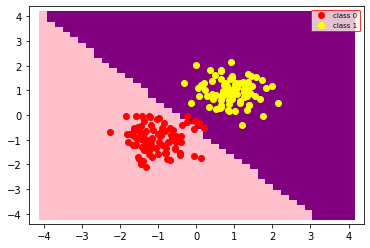

In [78]:
plot_decision_boundary(model=lgr, arrayX=dataset.trainX, arrayY=dataset.trainY, N_gridpoints=40)

In [79]:
dataset = create_data_set(100, 1.0)

In [25]:
lgr = LogisticRegression()
lgr.fit(dataset.trainX, dataset.trainY)
predictions = lgr.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 0.9


In [41]:
knn = KNeighborsClassifier()
knn.fit(dataset.trainX, dataset.trainY)
predictions = knn.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 0.9


In [66]:
model = Sequential([Dense(units=1, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(dataset.trainX, dataset.trainY, epochs=100)
predictions = model.predict(dataset.testX)
print(f'accuracy: {accuracy_score(np.round(predictions.flatten()), dataset.testY)}')

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 3.4187
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 1.9304
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1344
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7003
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4520
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3165
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1928
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1623
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1435
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 0.1300
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1202
Epoch 13/100
6/6 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 41ms/step
accuracy: 0.9


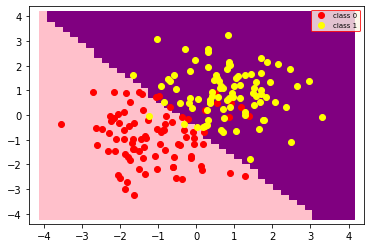

In [80]:
plot_decision_boundary(model=lgr, arrayX=dataset.trainX, arrayY=dataset.trainY, N_gridpoints=40)

In [81]:
dataset = create_data_set(200, 1.5)

In [28]:
lgr = LogisticRegression()
lgr.fit(dataset.trainX, dataset.trainY)
predictions = lgr.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 0.75


In [43]:
knn = KNeighborsClassifier()
knn.fit(dataset.trainX, dataset.trainY)
predictions = knn.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 0.65


In [68]:
model = Sequential([Dense(units=1, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(dataset.trainX, dataset.trainY, epochs=150)
predictions = model.predict(dataset.testX)
print(f'accuracy: {accuracy_score(np.round(predictions.flatten()), dataset.testY)}')

Epoch 1/150
12/12 [==============================] - 0s 2ms/step - loss: 1.1843
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4066
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 0.2541
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 0.2032
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1770
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1618
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1524
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1467
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1430
Epoch 10/150
12/12 [==============================] - 0s 3ms/step - loss: 0.1410
Epoch 11/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1396
Epoch 12/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1388
Epoch 13/150
12/12 [=================

50/50 [==============================] - 0s 2ms/step


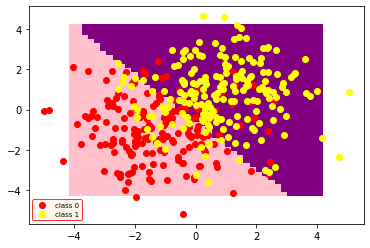

In [86]:
plot_decision_boundary(model=model, arrayX=dataset.trainX, arrayY=dataset.trainY, N_gridpoints=40)

#Multiclass

In [90]:
def create_normal_distributed_data(classes_scale: int, intersect_rate: float) -> DataSet:
    np.random.seed(0)
    l = classes_scale
    n = 2
    drop = intersect_rate

    X0 = np.array([[-2, -2]]) + drop * np.random.randn(l, n)
    X1 = np.array([[-2, 2]]) + drop * np.random.randn(l, n)
    X2 = np.array([[2, -2]]) + drop * np.random.randn(l, n)
    X3 = np.array([[2, 2]]) + drop * np.random.randn(l, n)

    # конкатенируем все в одну матрицу
    # при этом по 20 точек оставим на тест/валидацию
    X = np.vstack((X0[10:], X1[10:], X2[10:], X3[10:]))
    ValX = np.vstack((X0[:10], X1[:10], X2[:10], X3[:10]))

    # конкатенируем все в один столбец с соответствующими значениями для класса 0 или 1
    y = np.hstack([[0] * (l - 10), [1] * (l - 10), [2] * (l - 10), [3] * (l - 10)])
    ValY = np.hstack([[0] * 10, [1] * 10, [2] * 10, [3] * 10])

    return DataSet(trainX=X, trainY=y, testX=ValX, testY=ValY)


def create_data_set(classes_scale: int, intersect_rate: float) -> DataSet:
    # из этого можно сделать некоторую общую библиотеку
    return create_normal_distributed_data(classes_scale, intersect_rate)

In [91]:
dataset = create_data_set(classes_scale=100, intersect_rate=0.5)

In [92]:
lgr = LogisticRegression()
lgr.fit(dataset.trainX, dataset.trainY)
predictions = lgr.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 1.0


In [93]:
knn = KNeighborsClassifier()
knn.fit(dataset.trainX, dataset.trainY)
predictions = knn.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 1.0


In [98]:
def plot_decision_boudary(model, dataset: DataSet, N_gridpoints: int) -> None:
    # разбиваем область на точки
    _xx, _yy = np.linspace(-4, 4, N_gridpoints), np.linspace(-4, 4, N_gridpoints)

    _zz = np.zeros_like(_xx)


    points = []
    for i in range(N_gridpoints):
        for j in range(N_gridpoints):
            points.append([_xx[i], _yy[j]])

    _zz = model.predict(points)

    _zz = [_zz[i] for i in range(len(_zz))]

    colors = ['pink', 'purple', 'blue', 'red']

    for i in range(len(points)):
        if _zz[i] == 0:
            plt.scatter(x=points[i][0], y=points[i][1], s=150, c=colors[0], marker='s')
        elif _zz[i] == 1:
            plt.scatter(x=points[i][0], y=points[i][1], s=150, c=colors[1], marker='s')
        elif _zz[i] == 2:
            plt.scatter(x=points[i][0], y=points[i][1], s=150, c=colors[2], marker='s')
        elif _zz[i] == 3:
            plt.scatter(x=points[i][0], y=points[i][1], s=150, c=colors[3], marker='s')

    dataset_colors = ['green', 'yellow', 'black', 'orange']

    for k in np.unique(dataset.trainY):
        plt.plot(dataset.trainX[dataset.trainY == k, 0], dataset.trainX[dataset.trainY == k, 1], 'o', label=f'class {k} + {colors[k]}',
                 color=dataset_colors[k])

    plt.legend(fontsize=7, ncol=1, facecolor='oldlace', edgecolor='r')
    plt.show()

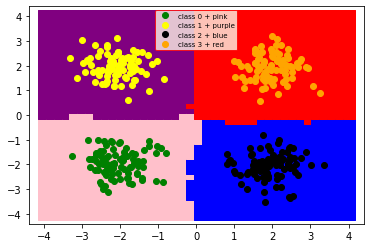

In [99]:
plot_decision_boudary(model=knn, dataset=dataset, N_gridpoints=40)

In [100]:
def create_normal_distributed_data(classes_scale: int, intersect_rate: float) -> DataSet:
    np.random.seed(0)
    l = classes_scale
    n = 2
    drop = intersect_rate

    X0 = np.array([[-2, -2]]) + drop * np.random.randn(l, n)
    X1 = np.array([[-2, 2]]) + drop * np.random.randn(l, n)
    X2 = np.array([[2, -2]]) + drop * np.random.randn(l, n)
    X3 = np.array([[2, 2]]) + drop * np.random.randn(l, n)

    # конкатенируем все в одну матрицу
    # при этом по 20 точек оставим на тест/валидацию
    X = np.vstack((X0[10:], X1[10:], X2[10:], X3[10:]))
    ValX = np.vstack((X0[:10], X1[:10], X2[:10], X3[:10]))

    # конкатенируем все в один столбец с соответствующими значениями для класса 0 или 1
    y = np.hstack([[0] * (l - 10), [0] * (l - 10), [1] * (l - 10), [1] * (l - 10)])
    ValY = np.hstack([[0] * 10, [0] * 10, [1] * 10, [1] * 10])

    return DataSet(trainX=X, trainY=y, testX=ValX, testY=ValY)


def create_data_set(classes_scale: int, intersect_rate: float) -> DataSet:
    # из этого можно сделать некоторую общую библиотеку
    return create_normal_distributed_data(classes_scale, intersect_rate)

In [101]:
dataset = create_data_set(classes_scale=100, intersect_rate=0.5)

In [102]:
knn = KNeighborsClassifier()
knn.fit(dataset.trainX, dataset.trainY)
predictions = knn.predict(dataset.testX)
print(f'accuracy: {accuracy_score(predictions, dataset.testY)}')

accuracy: 1.0


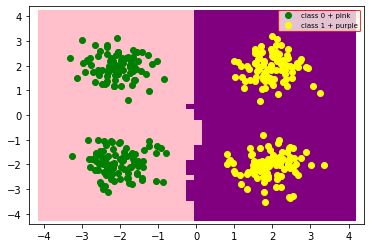

In [103]:
plot_decision_boudary(model=knn, dataset=dataset, N_gridpoints=40)